In [1]:
"""
tf实现线性回归,参考：https://www.jianshu.com/p/3d0b054a205d
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#设置超参数
learning_rate = 0.01    # 学习率
training_epochs = 1000  # 训练轮数
display_step = 50       # 隔50次检查一次精确度


In [2]:
# Training Data 给出训练数据
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]  # 样本数

In [3]:
# tf Graph Input  //线性模型参数初始化
X = tf.placeholder("float")    # x占位符
Y = tf.placeholder("float")    # y占位符

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")    # 权重
b = tf.Variable(np.random.randn(), name="bias")      # 偏置

In [4]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)                  # x*w+b

In [5]:
# Mean squared error  定义均方差代价函数 
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples) # 1/2n∑ (yi'-yi)^2

In [6]:
#优化器 ，使用随机梯度下降法进行优化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  # 优化器
# Initialize the variables (i.e. assign their default value)
#定义初始化
init = tf.global_variables_initializer()    # 初始化

Epoch: 0050 cost= 0.161469445 W= 0.4121433 b= -0.36790442
Epoch: 0100 cost= 0.151706070 W= 0.40247577 b= -0.29835692
Epoch: 0150 cost= 0.143070295 W= 0.39338315 b= -0.23294555
Epoch: 0200 cost= 0.135431916 W= 0.3848313 b= -0.1714243
Epoch: 0250 cost= 0.128675833 W= 0.37678817 b= -0.11356194
Epoch: 0300 cost= 0.122700132 W= 0.36922327 b= -0.05914075
Epoch: 0350 cost= 0.117414720 W= 0.36210823 b= -0.007956373
Epoch: 0400 cost= 0.112739876 W= 0.35541657 b= 0.040183846
Epoch: 0450 cost= 0.108605146 W= 0.34912267 b= 0.08546101
Epoch: 0500 cost= 0.104948163 W= 0.34320325 b= 0.1280452
Epoch: 0550 cost= 0.101713754 W= 0.33763593 b= 0.16809656
Epoch: 0600 cost= 0.098853044 W= 0.33239958 b= 0.20576623
Epoch: 0650 cost= 0.096322961 W= 0.3274747 b= 0.24119562
Epoch: 0700 cost= 0.094085284 W= 0.32284275 b= 0.2745175
Epoch: 0750 cost= 0.092106231 W= 0.31848615 b= 0.3058582
Epoch: 0800 cost= 0.090355970 W= 0.31438884 b= 0.33533406
Epoch: 0850 cost= 0.088808075 W= 0.31053522 b= 0.36305702
Epoch: 0900 

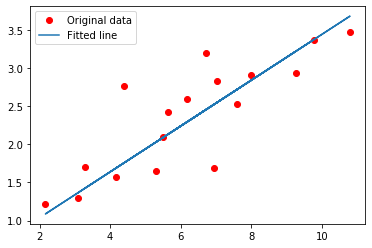

In [7]:
# Start training
with tf.Session() as sess:    # 创建会话

    # Run the initializer
    sess.run(init)           # 在会话中执行初始化

    # Fit all training data
    for epoch in range(training_epochs):    # 循环训练
        for (x, y) in zip(train_X, train_Y): # 遍历训练集
            sess.run(optimizer, feed_dict={X: x, Y: y})  # 执行训练

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:     # 每50步打印损失值、权重、偏置
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y}) # 使用全部训练集计算损失值
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})   # 训练结束后，使用全部数据计算损失值
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')  # 画数据点
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') # 画直线
    plt.legend()  # 图例
    plt.show()    # 显示图片